In [1]:
import cv2

In [2]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [3]:
from matplotlib import pyplot as plt

In [4]:
# Task 1
# Write an algorithm that performs the following two steps. First, it should create a new image,
# let us call it image A, with the same size (number of pixel rows and columns) as the input
# image, which we call I. Second, the algorithm should go through the pixels of I one by one,
# and for each pixel (x,y) it must find the maximum gray value in a neighbourhood around that
# pixel, and write that maximum gray value in the corresponding pixel location (x,y) in A. The
# resulting image A is called a max-filtered image of input image I.

# The max-filtering causes the gray values in A to be higher than the actual background values
# in I, so a correction is needed. Extend your algorithm to create another image, which we call
# image B here, of the same size as I and A. Now let the algorithm go through the pixels of A
# one by one, and for each pixel (x,y) find the minimum gray value in an N x N neighbourhood
# around that pixel, and write that minimum gray value in (x,y) in B.


In [5]:
def getMaxGrayValue(N,img,center):
    width,height = img.shape
    row,col = center
    pad_length=int((N-1)/2)
    # padding length here
    up=row-pad_length
    down=pad_length+row
    left=col-pad_length
    right=pad_length+col
    # set the boundary here, if the filter window out of the index, reset it 
    if up<0:
        up=0
    if left<0:
        left=0
    if down>width-1:
        down=width-1
    if right>height-1:
        right=height-1
    # get the neighbourhood(window_size)
    neighbour = img[up:down+1, left:right+1]
    # get the maximum value of neighbours
    max_grey_value = np.max(neighbour)
    return max_grey_value

In [6]:
def getMinGrayValue(N,img,center):
    width,height = img.shape
    row,col = center
    pad_length=int((N-1)/2) 
#     padding length here
    up=row-pad_length
    down=pad_length+row
    left=col-pad_length
    right=pad_length+col
    # set the boundary here, if the filter window out of the index, reset it  
    if up<0:
        up=0
    if left<0:
        left=0
    if down>width-1:
        down=width-1
    if right>height-1:
        right=height-1
    # get the neighbourhood(window_size)
    neighbour = img[up:down+1, left:right+1]
    # get the minimum value of neighbours
    min_grey_value = np.min(neighbour)
    return min_grey_value

In [7]:
# Task 2
# Now that your algorithm can estimate the background B of an image I, removing the shading
# artifacts from I can be done simply by subtracting B pixel by pixel from I, resulting in the
# output image O. Extend your algorithm to perform this subtraction.
# In your report, include image O computed from Particles.png.

In [8]:
# Task 3
# Extend your algorithm with another free parameter, named M. If the user sets M = 0, the
# algorithm should perform max-filtering (image I to A), then min-filtering (image A to B),
# then subtraction (O = I – B). And if the user sets M = 1, the algorithm should perform first
# min-filtering, then max-filtering, then subtraction.
# In your report, explain why Particles.png requires M = 0, and Cells.png requires M = 1. Also
# mention what is a good value of N for Cells.png and why. And include images B and O
# computed from Cells.png in your report.

In [9]:
def read_create_img(filename):
    # read the img as grayscale image
    img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    width,height = img.shape
    # set two new images with same size of original image
    image_A = np.zeros((width,height),np.uint8)
    image_B = np.zeros((width,height),np.uint8)
    return img,image_A,image_B

In [29]:
# main code
def output(M,img,image_A,image_B,N):
    width,height = img.shape
    image_o = np.zeros((width,height),np.uint8)
#     if M =0, max-filtering first and then min-filtering
    if M == 0:
        for i in range(width):
            for j in range(height):
                image_A[i,j] = getMaxGrayValue(N,img,(i,j))
        for i in range(width):
            for j in range(height): 
                image_B[i,j] = getMinGrayValue(N,image_A,(i,j))
        image_o = img - image_B + 255
        cv2.imwrite("Task2_output.png",image_o)
        cv2.imwrite("Task1_image_B.png",image_B)
#     if M = 0,min-filtering first and then max-filtering
    if M == 1:
        for i in range(width):
            for j in range(height):
                image_A[i,j] = getMinGrayValue(N,img,(i,j))
        for i in range(width):
            for j in range(height):
                image_B[i,j] = getMaxGrayValue(N,image_A,(i,j))
        image_o = img - image_B
        cv2.imwrite("Task3_output.png",image_o)
        cv2.imwrite("Task3_image_B.png",image_B)
    return image_o
        

In [88]:
# Please input the name of original image here
filename = input()

Cells.png


In [89]:
# Please input 0/1 here. 
# If the background is dark and the objects are bright, choose 1
# If the background is bright and the objects are dark, choose 0
M = int(input())

1


In [122]:
# Please input the parameter N for N*N filter window
N = int(input())

29


In [123]:
# read original image and create two intermediate image here
img,image_A,image_B = read_create_img(filename)

In [124]:
# get the output image here
image_O = output(M,img,image_A,image_B,N)
# image_O_2 = output(M,img,image_A,image_B,31) 

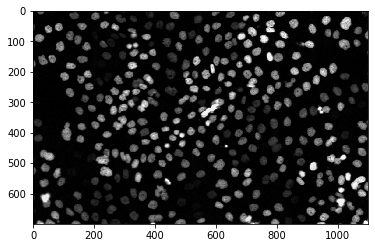

In [125]:
# show the output image
plt.imshow(image_O,"gray")

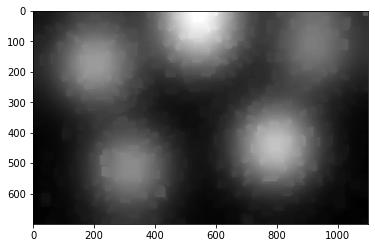

In [126]:
# show the image B I got here
plt.imshow(image_B,"gray")